In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Example: Reading a CSV file from Google Drive
import pandas as pd

# Correct the file path by adding 'r' before the string (raw string) or replacing spaces with '\ '
file_path = r'/content/drive/My Drive/DSO 585 - Fraud Analytics/creditcard.csv'
creditcard = pd.read_csv(file_path)

# Display the first few rows
creditcard.head()



Mounted at /content/drive


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
creditcard.isnull().sum()


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
creditcard['Class'].value_counts()


,count
Class,
0,284315
1,492


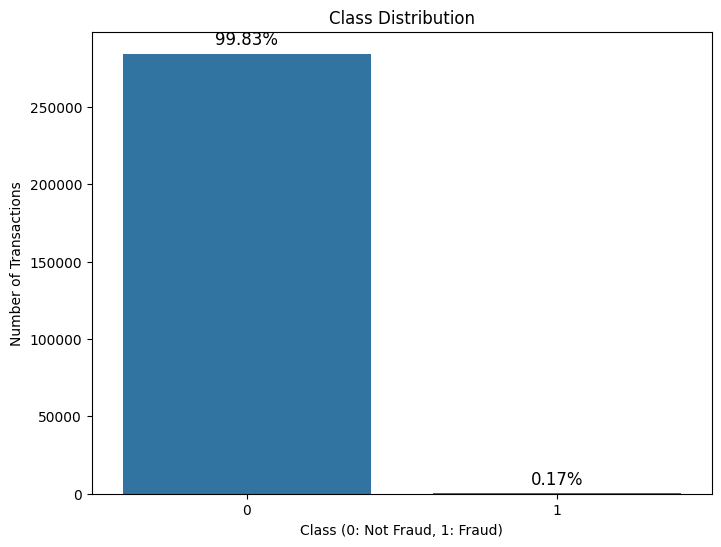

In [ ]:
# prompt: graph of class distribution in detail (1 is fraud, 0 is not fraud) with the percentage number on the bar

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'creditcard' DataFrame is already loaded as in your previous code

# Calculate the percentage of each class
class_counts = creditcard['Class'].value_counts()
class_percentages = (class_counts / len(creditcard)) * 100

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Class', data=creditcard)
plt.title('Class Distribution')
plt.xlabel('Class (0: Not Fraud, 1: Fraud)')
plt.ylabel('Number of Transactions')

# Add percentage labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()/len(creditcard):.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()


In [ ]:
legit = creditcard[creditcard.Class == 0]
fraud = creditcard[creditcard.Class == 1]

print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
legit.Amount.describe()


,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [ ]:
fraud.Amount.describe()


,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [ ]:
legit_sample = legit.sample(n=492)
legit_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
264786,161594.0,-0.294007,0.344233,0.163190,-0.654355,1.319370,-1.012780,0.774594,-0.193130,-0.169401,...,-0.157465,-0.501710,0.089815,-0.651050,-0.882483,0.098171,0.137727,0.216144,0.89,0
277952,167951.0,-2.781089,-1.251395,-0.104376,-0.344288,0.359293,-0.773023,-0.632362,0.821016,-0.173682,...,0.392250,0.810583,-0.699462,-0.352448,-0.841783,0.141044,0.248993,-0.551965,172.10,0
117578,74727.0,-0.809910,0.995062,1.114175,0.073135,-0.333193,-0.071817,0.059337,0.638455,-0.166593,...,0.045206,0.281213,-0.177757,0.035373,-0.117196,0.370561,0.225439,0.123836,7.27,0
6989,9140.0,-0.790966,1.195683,1.270240,-0.267146,-0.023160,-0.566069,0.306686,0.384884,0.789019,...,-0.223746,-0.609533,0.140475,-0.028320,-0.642916,-0.137278,-0.053218,0.076091,8.99,0
214897,139861.0,-0.388608,0.526256,0.083710,-0.182225,0.650576,-1.227485,0.783434,-0.410312,0.018003,...,-0.153362,-0.378645,0.189460,0.066961,-0.941214,0.104108,-0.335536,0.215560,11.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45410,42330.0,1.265088,-0.197018,-0.107165,-1.399353,-0.596093,-1.602343,0.275721,-0.419278,0.962786,...,-0.095323,-0.222480,-0.065729,0.442591,0.551552,-0.116888,-0.013902,0.019174,44.00,0
184377,126218.0,-0.948814,-0.187007,-0.746886,-3.263530,1.975083,3.468892,-0.700288,1.455450,-1.121767,...,0.306651,0.565739,-0.068945,0.713713,0.041963,-0.252104,0.244913,0.093451,43.00,0
275850,166754.0,2.223978,-0.578064,-1.279806,-0.877490,-0.507757,-1.414539,-0.205135,-0.516659,-0.746568,...,0.450303,1.390817,-0.030041,0.146642,0.250225,0.061195,-0.029960,-0.062266,15.00,0
165862,117715.0,-4.987828,2.001452,-3.035024,-2.477412,2.275538,3.422671,1.694349,-0.032361,4.199743,...,-1.448516,-0.920446,-0.333296,0.678266,0.238409,-0.050014,-0.254911,-0.208523,89.99,0


In [ ]:
new_creditcard = pd.concat([legit_sample, fraud], axis=0)
new_creditcard.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
264786,161594.0,-0.294007,0.344233,0.163190,-0.654355,1.319370,-1.012780,0.774594,-0.193130,-0.169401,...,-0.157465,-0.501710,0.089815,-0.651050,-0.882483,0.098171,0.137727,0.216144,0.89,0
277952,167951.0,-2.781089,-1.251395,-0.104376,-0.344288,0.359293,-0.773023,-0.632362,0.821016,-0.173682,...,0.392250,0.810583,-0.699462,-0.352448,-0.841783,0.141044,0.248993,-0.551965,172.10,0
117578,74727.0,-0.809910,0.995062,1.114175,0.073135,-0.333193,-0.071817,0.059337,0.638455,-0.166593,...,0.045206,0.281213,-0.177757,0.035373,-0.117196,0.370561,0.225439,0.123836,7.27,0
6989,9140.0,-0.790966,1.195683,1.270240,-0.267146,-0.023160,-0.566069,0.306686,0.384884,0.789019,...,-0.223746,-0.609533,0.140475,-0.028320,-0.642916,-0.137278,-0.053218,0.076091,8.99,0
214897,139861.0,-0.388608,0.526256,0.083710,-0.182225,0.650576,-1.227485,0.783434,-0.410312,0.018003,...,-0.153362,-0.378645,0.189460,0.066961,-0.941214,0.104108,-0.335536,0.215560,11.03,0


In [ ]:
new_creditcard['Class'].value_counts()


,count
Class,
0,492
1,492


In [ ]:
new_creditcard.groupby('Class').mean()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96010.361789,-0.093600,0.004332,0.025774,0.018806,-0.007840,-0.020882,0.044100,-0.021790,0.027605,...,0.027760,0.009527,-0.049049,0.033075,0.032645,-0.020109,0.002237,-0.014487,0.026217,99.146931
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
new_creditcard = pd.concat([legit_sample, fraud], axis=0)
new_creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
19965,30684.0,-5.327081,-6.271042,0.820532,-0.393038,3.718366,-2.566594,-3.324916,1.024095,-0.863039,...,0.901585,0.062727,-0.375010,-1.277977,0.527447,-0.132376,0.016027,-0.967423,69.00,0
162201,114923.0,2.007479,-0.330997,-0.885434,0.064956,-0.112726,-0.276495,-0.322485,-0.064957,1.235968,...,-0.191416,-0.530624,0.227105,-1.132975,-0.283828,-0.909815,0.045899,-0.032787,36.00,0
46660,42875.0,-0.838710,0.821476,1.667349,1.263790,-0.023530,0.413302,1.564240,-0.344112,-1.650655,...,0.016279,0.146100,-0.278669,0.073678,0.214042,1.066204,-0.237884,-0.222312,189.59,0
19444,30291.0,1.188188,0.150424,0.367094,0.742190,-0.545465,-0.843043,-0.137152,0.042263,0.348625,...,-0.264444,-0.840763,0.226064,0.298184,0.023291,0.111479,-0.020973,0.025893,1.98,0
185318,126620.0,1.810591,0.010180,-0.719664,3.833511,0.454972,1.033766,-0.199795,0.182547,-0.100263,...,0.063870,0.237359,-0.031909,0.020766,0.169923,0.139587,-0.027579,-0.036448,74.42,0


In [ ]:
# prompt: make a gradient boosting

from sklearn.ensemble import GradientBoostingClassifier

X = new_creditcard.drop(columns='Class', axis=1)
Y = new_creditcard['Class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
model = GradientBoostingClassifier()
model.fit(X_train, Y_train)


GradientBoostingClassifier()

In [ ]:
X = new_creditcard.drop(columns='Class', axis=1)
Y = new_creditcard['Class']

In [ ]:
# prompt: make a gradient boosting

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ... (Your existing code) ...gh

X = new_creditcard.drop(columns='Class', axis=1)
Y = new_creditcard['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Initialize and train a GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=2) # You can adjust parameters
gb_classifier.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = gb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(Y_test, Y_pred))

conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
conf_matrix


Accuracy: 0.9086294416243654
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        99
           1       0.94      0.87      0.90        98

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197

Confusion Matrix:


array([[94,  5],
       [13, 85]])

In [ ]:
print(X)


            Time        V1        V2        V3        V4        V5        V6  \
19965    30684.0 -5.327081 -6.271042  0.820532 -0.393038  3.718366 -2.566594   
162201  114923.0  2.007479 -0.330997 -0.885434  0.064956 -0.112726 -0.276495   
46660    42875.0 -0.838710  0.821476  1.667349  1.263790 -0.023530  0.413302   
19444    30291.0  1.188188  0.150424  0.367094  0.742190 -0.545465 -0.843043   
185318  126620.0  1.810591  0.010180 -0.719664  3.833511  0.454972  1.033766   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [ ]:
print(Y)


19965     0
162201    0
46660     0
19444     0
185318    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)


(984, 30) (787, 30) (197, 30)


In [ ]:
model = LogisticRegression()
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9491740787801779


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)


Accuracy score on Test Data :  0.934010152284264


Optimal Threshold: 0.56
Optimal Precision: 0.97
Optimal Recall: 0.91
Optimal F1-Score: 0.94
AUC (Precision-Recall): 0.98


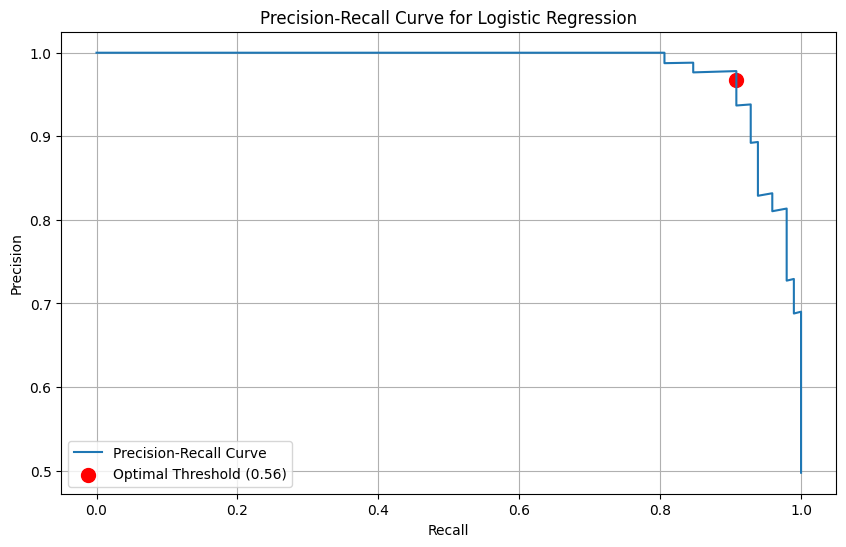

In [ ]:
# prompt: make a detailed precision-recall curve with the logistic regression with the Optimal Threshold, Optimal Precision, Optimal Recall, Optimal F1-Score

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score, auc

# ... (Your existing code) ...

# Predict probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(Y_test, y_prob)

# Find the optimal threshold based on F1-score
f1_scores = [f1_score(Y_test, y_prob > t) for t in thresholds]
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_f1 = f1_scores[optimal_idx]
optimal_precision = precision[optimal_idx]
optimal_recall = recall[optimal_idx]

# Plot the precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')

# Highlight the optimal point
plt.scatter(optimal_recall, optimal_precision, marker='o', color='red', s=100, label=f'Optimal Threshold ({optimal_threshold:.2f})')

plt.grid(True)
plt.legend(loc='lower left')

# Display optimal metrics
print(f"Optimal Threshold: {optimal_threshold:.2f}")
print(f"Optimal Precision: {optimal_precision:.2f}")
print(f"Optimal Recall: {optimal_recall:.2f}")
print(f"Optimal F1-Score: {optimal_f1:.2f}")

# Calculate AUC
pr_auc = auc(recall, precision)
print(f"AUC (Precision-Recall): {pr_auc:.2f}")

plt.show()


Optimal Threshold: 0.8822934516585419
Optimal Precision: 0.9883720930232558
Optimal Recall: 0.8673469387755102
Optimal F1-Score: 0.9239130434782609


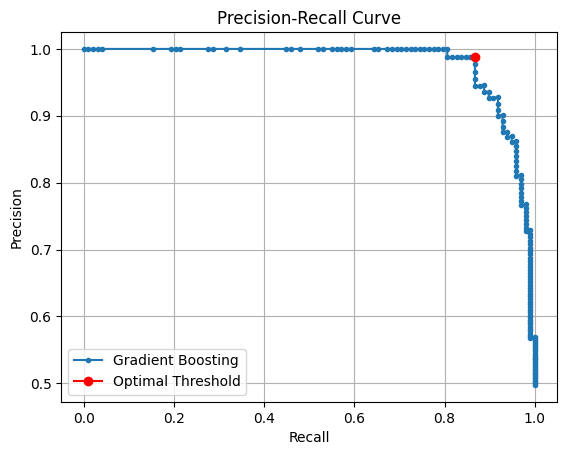

In [ ]:
# prompt: make a detailed precision-recall curve with the logistic regression value

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# ... (Your existing code) ...

# Get predicted probabilities for the positive class (Class 1)
Y_pred_proba = gb_classifier.predict_proba(X_test)[:, 1]

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred_proba)

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.', label='Gradient Boosting')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)

# Find the threshold that maximizes the F1-score (harmonic mean of precision and recall)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_precision = precision[optimal_idx]
optimal_recall = recall[optimal_idx]
optimal_f1 = f1_scores[optimal_idx]

# Print the optimal values
print(f"Optimal Threshold: {optimal_threshold}")
print(f"Optimal Precision: {optimal_precision}")
print(f"Optimal Recall: {optimal_recall}")
print(f"Optimal F1-Score: {optimal_f1}")

# Add a point for the optimal threshold on the plot
plt.plot(optimal_recall, optimal_precision, marker='o', color='red', label='Optimal Threshold')
plt.legend()

plt.show()


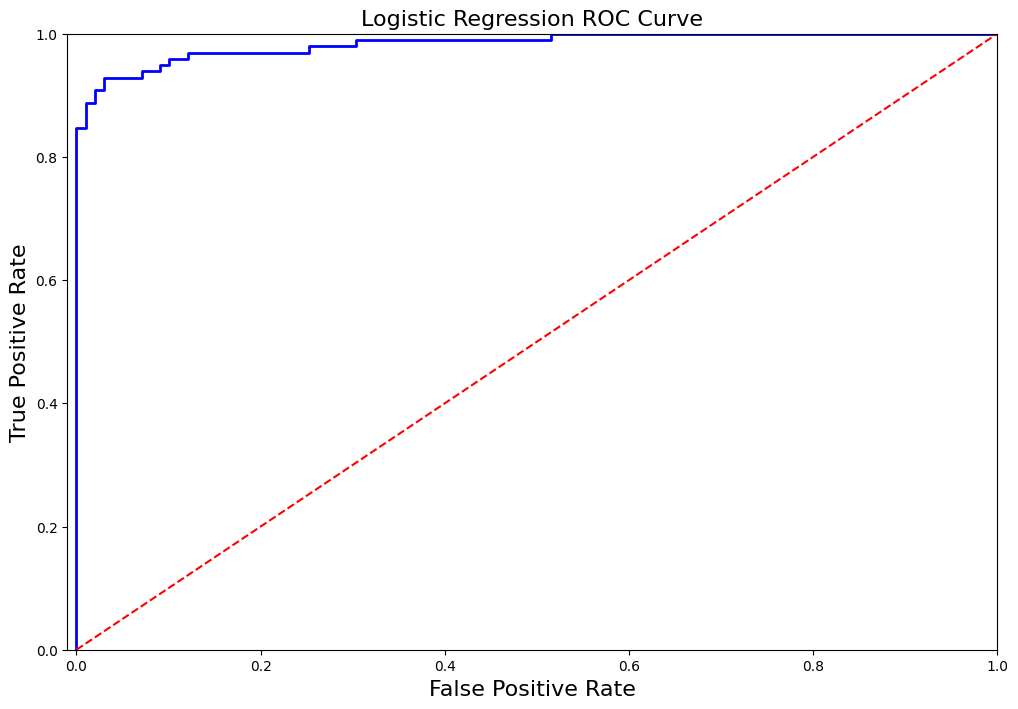

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])


# Assuming you have a trained model 'model' and test data X_test, Y_test
# Calculate log_fpr and log_tpr
log_fpr, log_tpr, _ = roc_curve(Y_test, model.predict_proba(X_test)[:, 1]) # Calculate roc_curve

# Now call the function with the calculated values
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

# Assuming 'model' was intended to be used here
y_pred = model.predict(X_train)

# Overfitting Case
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(Y_train, y_pred))) # Corrected to use Y_train for recall calculation
print('Precision Score: {:.2f}'.format(precision_score(Y_train, y_pred))) # Corrected to use Y_train for precision calculation
print('F1 Score: {:.2f}'.format(f1_score(Y_train, y_pred))) # Corrected to use Y_train for F1 calculation
print('Accuracy Score: {:.2f}'.format(accuracy_score(Y_train, y_pred))) # Corrected to use Y_train for accuracy calculation


Overfitting: 

Recall Score: 0.93
Precision Score: 0.97
F1 Score: 0.95
Accuracy Score: 0.95


In [ ]:
# prompt: make a logistic regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'Class' is the target variable
X = creditcard.drop('Class', axis=1)
y = creditcard['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
logreg = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[56852    12]
 [   47    51]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.52      0.63        98

    accuracy                           1.00     56962
   macro avg       0.90      0.76      0.82     56962
weighted avg       1.00      1.00      1.00     56962



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


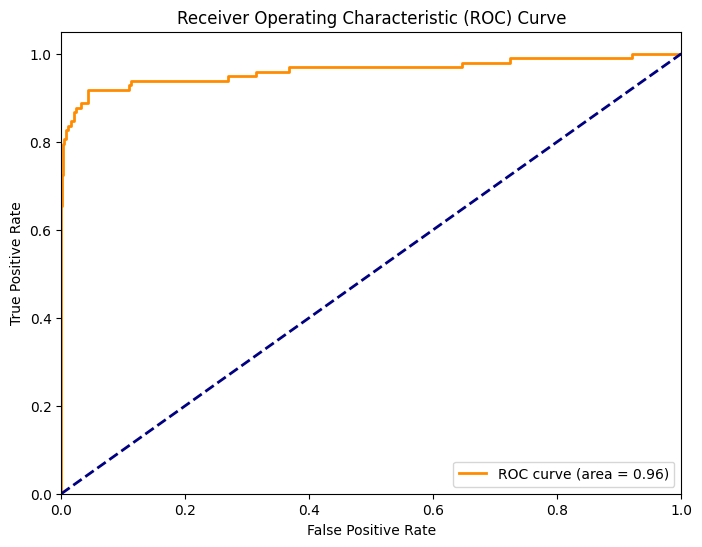

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# ... (your existing code) ...

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
X = creditcard.drop('Class',axis=1)
y = creditcard['Class']